"Hello world" program in qiskit

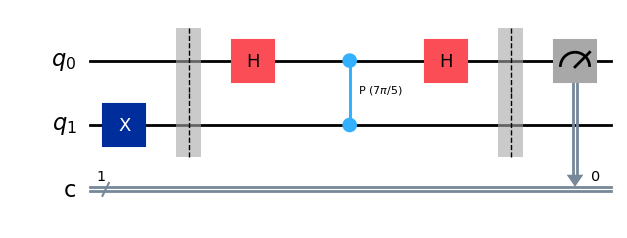

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
import numpy as np
from math import pi, cos, sin

theta = 0.7
q = QuantumRegister(2, 'q')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(q, c)

# q1 must be eigenvector of U operation
qc.x(q[1])
qc.barrier()

qc.h(q[0])
qc.cp(2 * pi * theta, q[0], q[1])
qc.h(q[0])
qc.barrier()

qc.measure(q[0], c)

qc.draw("mpl")

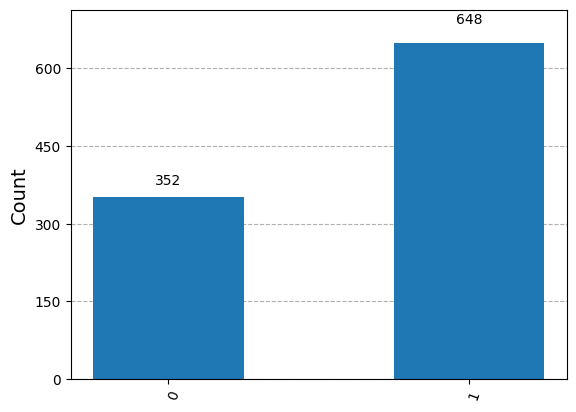

In [17]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

result = AerSimulator().run(qc, shots = 1000).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [18]:
print(f"cos(pi * {theta})**2 = {cos(pi * theta) ** 2:.4f}")
print(f"sin(pi * {theta})**2 = {sin(pi * theta) ** 2:.4f}")

cos(pi * 0.7)**2 = 0.3455
sin(pi * 0.7)**2 = 0.6545


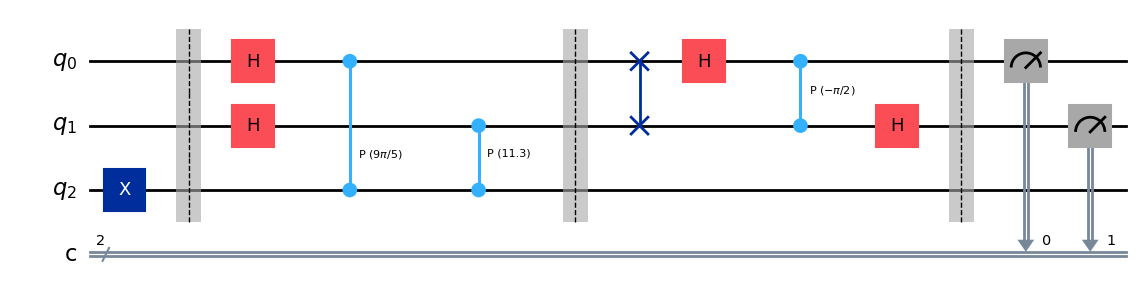

In [41]:
from qiskit.circuit.library import QFT

theta = 0.9
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

qc = QuantumCircuit(q, c)

qc.x(q[2])
qc.barrier()

qc.h(q[:2])
qc.cp(2 * pi * theta, q[0], q[2])
qc.cp(2 * pi * (2 * theta), q[1], q[2])
qc.barrier()

# double qubit inverse fourier transorm
qc.swap(q[0], q[1])
qc.h(q[0])
qc.cp(-pi / 2, q[0], q[1])
qc.h(q[1])
qc.barrier()

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

qc.draw("mpl")

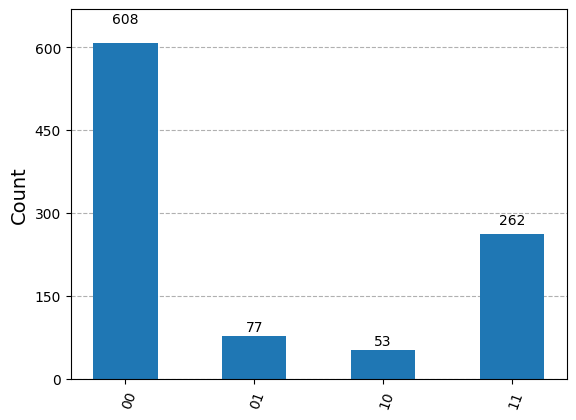

In [42]:
result = AerSimulator().run(qc, shots = 1000).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

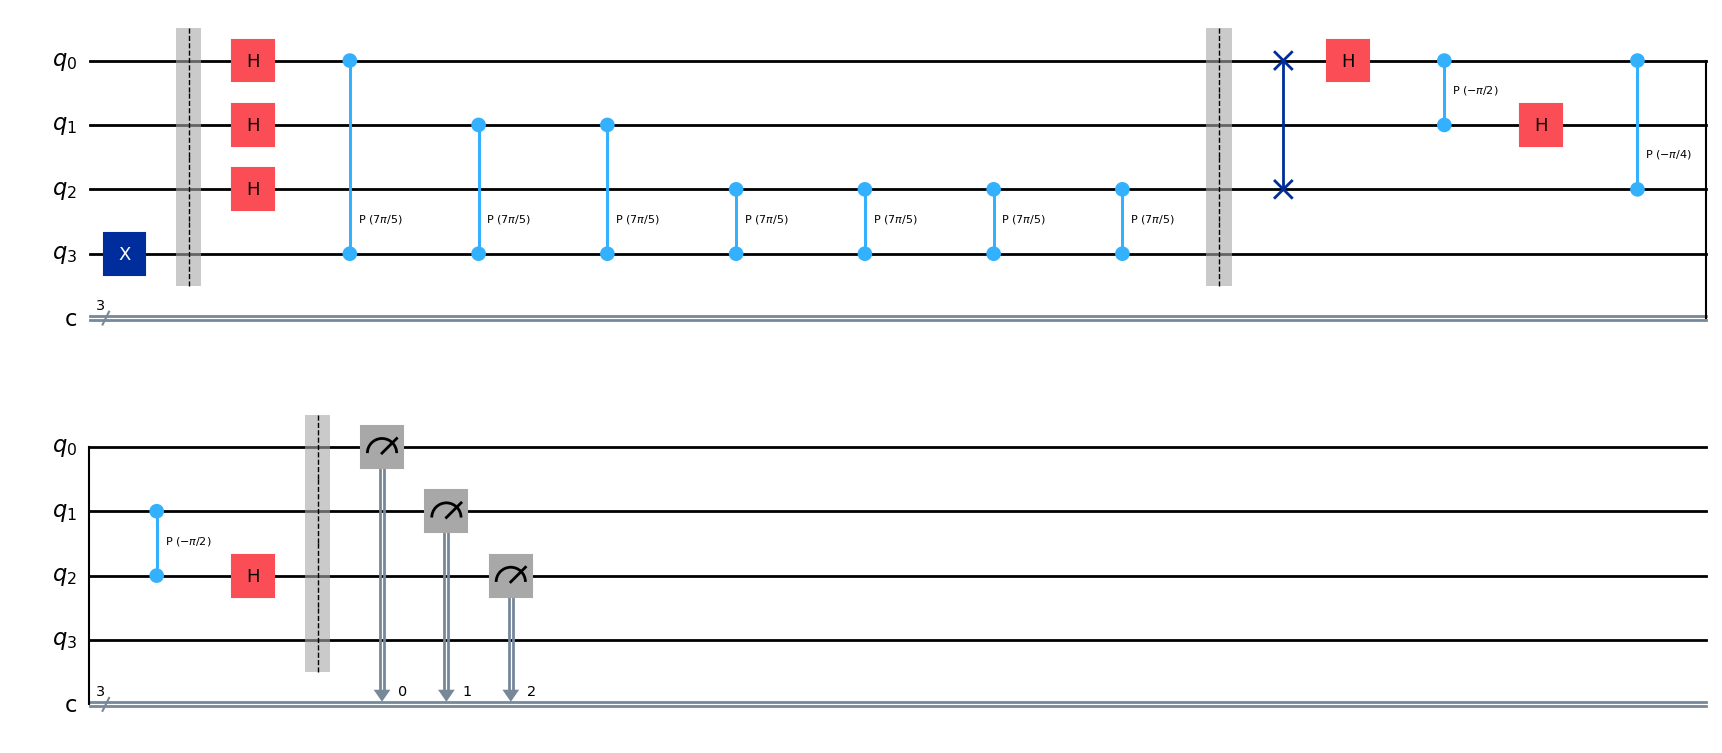

In [54]:
num_qubits = 4
theta = 0.7
q = QuantumRegister(num_qubits, 'q')
c = ClassicalRegister(num_qubits - 1, 'c')

qc = QuantumCircuit(q, c)

qc.x(q[num_qubits - 1])
qc.barrier()

qc.h(q[:num_qubits - 1])
for i in range(num_qubits - 1):
    for j in range(pow(2, i)):
        qc.cp(2 * pi * theta, q[i], q[num_qubits - 1])
qc.barrier()

qc.compose(
    QFT(num_qubits=num_qubits - 1, inverse=True).decompose(),
    inplace=True
)
qc.barrier()

qc.measure(range(num_qubits - 1), range(num_qubits - 1))

qc.draw("mpl")

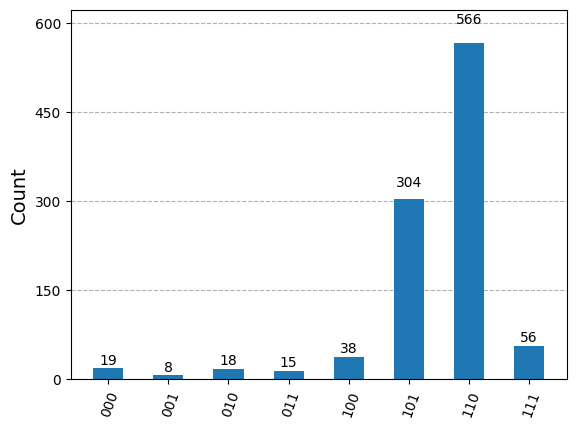

In [55]:
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [56]:
most_probable = int(max(statistics, key=statistics.get),2)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**(num_qubits - 1)}")

Most probable output: 6
Estimated theta: 0.75
